# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [ ]:
# Setting up GPU
#conda install -c apple tensorflow-deps
#pip install tensorflow-macos
#pip install tensorflow-metal

In [ ]:
# Checking for available GPUs
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [1]:
# Libraries
from keras.datasets import cifar100
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

#shape of the training and test sets
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}')

# where 32x32 are the pixel dimensions, and 3 represents the RGB color channels.

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 1)


In [3]:
# Dimensions of the images
dim_img = np.expand_dims(x_train, 0)

print(f'Original x_train shape: {x_train.shape}')
print(f'Expanded dimensions shape: {dim_img.shape}')   

Original x_train shape: (50000, 32, 32, 3)
Expanded dimensions shape: (1, 50000, 32, 32, 3)


In [4]:
# Number of classes
# train set
unique_classes = np.unique(y_train)
print(f'Unique classes in training set: {unique_classes}')
print(f'Number of unique training classes: {len(unique_classes)}')

# test set
unique_classes = np.unique(y_test)
print(f'Unique classes in test set: {unique_classes}')
print(f'Number of unique test classes: {len(unique_classes)}')

Unique classes in training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Number of unique training classes: 100
Unique classes in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Number of unique test classes: 100


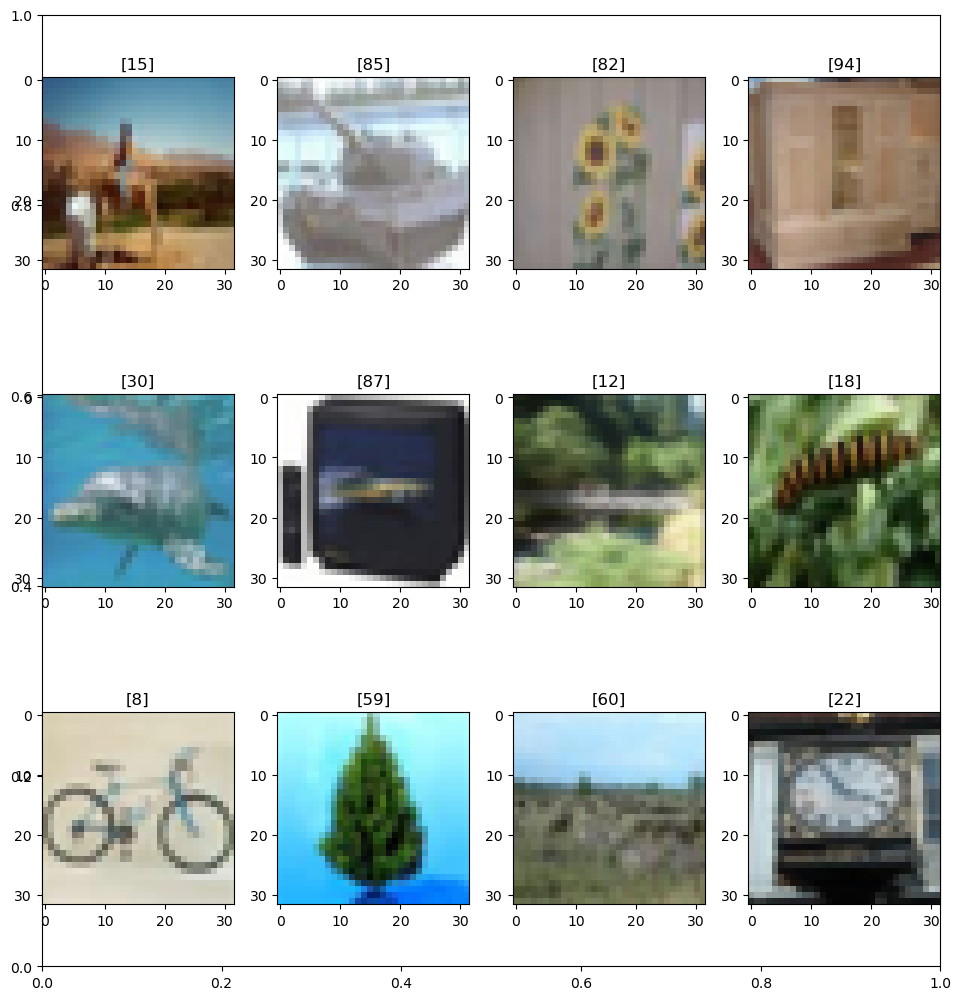

In [5]:
# Few examples from the training set.
def show_samples(data, labels): 
    plt.subplots(figsize=(10, 10)) 
    for i in range(12): 
        plt.subplot(3, 4, i+1) 
        k = np.random.randint(0, data.shape[0]) 
        plt.title(labels[k]) 
        plt.imshow(data[k]) 
    plt.tight_layout() 
    plt.show() 
  
  
show_samples(x_train, y_train)

In [6]:
# Min and Max pixel values
print(f'Min pixel value: {x_train.min()}, Max pixel value: {x_train.max()}')

Min pixel value: 0, Max pixel value: 255


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [7]:
# Normalizing the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
# Min and Max pixel values after normalization
print(f'Min pixel value: {x_train.min()}, Max pixel value: {x_train.max()}')

Min pixel value: 0.0, Max pixel value: 1.0


In [9]:
# Converting the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
from sklearn.model_selection import train_test_split

# Spliting the training set into training and validation sets. 80% training set for training and 20% for validation.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) 

# Checking the shapes of the new datasets
print(f'Training set shape: {x_train.shape}, {y_train.shape}')
print(f'Validation set shape: {x_val.shape}, {y_val.shape}') 

Training set shape: (40000, 32, 32, 3), (40000, 100)
Validation set shape: (10000, 32, 32, 3), (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization

# Building a basic CNN model
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))


2024-08-04 02:30:18.652271: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-04 02:30:18.652299: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-08-04 02:30:18.652308: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-08-04 02:30:18.652519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-04 02:30:18.652543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy: It is good for multi-class classification tasks 
- <b>Optimizer:</b> Adam: Can adapt the learning rate during training, which helps in faster convergence.

In [12]:
from keras.optimizers import Adam

# Configuring the training process
model.compile(optimizer= Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['AUC', 'accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,429,348 (5.45 MB)

 Trainable params: 1,428,516 (5.45 MB)

 Non-trainable params: 832 (3.25 KB)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

I chose a value of 100 for the epoch parameter because the training set contains 40,000 images. A higher number of epochs may allow the model to effectively utilize this data, helping it learn the diverse characteristics and patterns essential for classifying the 100 different classes in CIFAR-100.

In [15]:
# Training the model
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=100,
                    batch_size=32)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - AUC: 0.8391 - accuracy: 0.1499 - loss: 3.5632 - val_AUC: 0.8773 - val_accuracy: 0.2231 - val_loss: 3.2205
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - AUC: 0.8886 - accuracy: 0.2400 - loss: 3.0745 - val_AUC: 0.8898 - val_accuracy: 0.2419 - val_loss: 3.0530
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - AUC: 0.9171 - accuracy: 0.3071 - loss: 2.7037 - val_AUC: 0.9197 - val_accuracy: 0.3228 - val_loss: 2.6299
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - AUC: 0.9362 - accuracy: 0.3679 - loss: 2.3879 - val_AUC: 0.9294 - val_accuracy: 0.3630 - val_loss: 2.4649
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - AUC: 0.9502 - accuracy: 0.4316 - loss: 2.0965 - val_AUC: 0.9279 - val_accuracy: 0.3847 - val_loss: 2.3942
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - AUC: 0.9609 - accuracy: 0.4808 - loss: 1.8645 - val_AUC: 0.9337 - val_accuracy: 0.4040 - val_loss: 2.3128
Epoch 7/10

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> Ratio of correctly classified images to the total number of images.
- <b>Other metric:</b> AUC, the ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. 
- <b>Reason for selection:</b> Because accuracy is easy to understand, and AUC provides an intuitive measure of performance.
- <b>Value of metric:</b> Accuracy = 0.8240, AUC = 0.4204
- <b>Interpretation of metric value:</b>  The ccuracy of 82.40% suggests that the model is correctly classifying a majority of the instances in the dataset, but the AUC of of 0.4204 is low, this can indicate that the model has a poor discriminative ability.

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - AUC: 0.8244 - accuracy: 0.4224 - loss: 4.2757
Test Loss: 4.2958
Test Accuracy: 0.8240
Test AUC: 0.4204


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

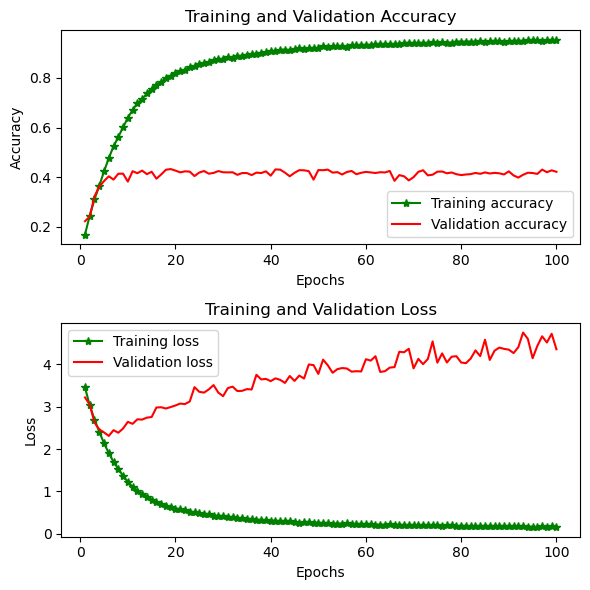

In [17]:
# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Plot training and validation accuracy
ax1.plot(epochs, acc, 'g*-', label='Training accuracy')
ax1.plot(epochs, val_acc, 'r-', label='Validation accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(epochs, loss, 'g*-', label='Training loss')
ax2.plot(epochs, val_loss, 'r-', label='Validation loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


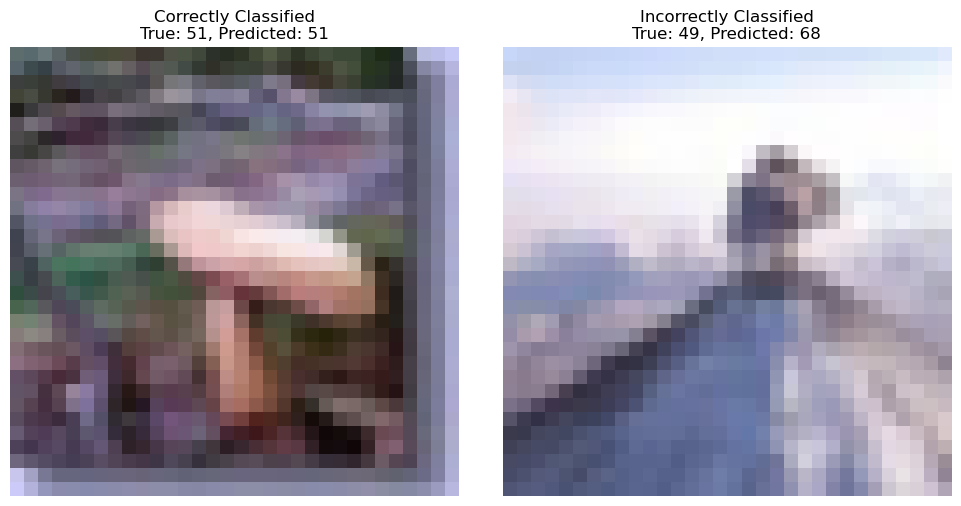

In [18]:
# Correctly classified in the test set, and an image that the model incorrectly classified in the test set
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions to class labels (for categorical predictions)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Identify indices of correctly classified and incorrectly classified images
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Select one correctly classified image
correct_index = correct_indices[0]  # Get the first correctly classified image
correct_image = x_test[correct_index]
correct_prediction = predicted_classes[correct_index]
true_label_correct = true_classes[correct_index]


# Select one incorrectly classified image
incorrect_index = incorrect_indices[0]  # Get the first incorrectly classified image
incorrect_image = x_test[incorrect_index]
incorrect_prediction = predicted_classes[incorrect_index]
true_label_incorrect = true_classes[incorrect_index]

# Plotting the images
plt.figure(figsize=(10, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"Correctly Classified\nTrue: {true_label_correct}, Predicted: {correct_prediction}")
plt.axis('off')

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"Incorrectly Classified\nTrue: {true_label_incorrect}, Predicted: {incorrect_prediction}")
plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
# Reporting the model's classification probabilities
correct_probabilities = predictions[correct_index]
incorrect_probabilities = predictions[incorrect_index]

print("Classification Probabilities for Correctly Classified Image:")
for i, prob in enumerate(correct_probabilities):
    print(f"Class {i}: {prob:.4f}")

print("\nClassification Probabilities for Incorrectly Classified Image:")
for i, prob in enumerate(incorrect_probabilities):
    print(f"Class {i}: {prob:.4f}")

Classification Probabilities for Correctly Classified Image:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0000
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000
Class 10: 0.0000
Class 11: 0.0000
Class 12: 0.0000
Class 13: 0.0000
Class 14: 0.0000
Class 15: 0.0000
Class 16: 0.0000
Class 17: 0.0000
Class 18: 0.0000
Class 19: 0.0000
Class 20: 0.0000
Class 21: 0.0000
Class 22: 0.0000
Class 23: 0.0000
Class 24: 0.0000
Class 25: 0.0000
Class 26: 0.0000
Class 27: 0.0000
Class 28: 0.0000
Class 29: 0.0000
Class 30: 0.0000
Class 31: 0.0000
Class 32: 0.0000
Class 33: 0.0000
Class 34: 0.0002
Class 35: 0.0000
Class 36: 0.0000
Class 37: 0.0020
Class 38: 0.0000
Class 39: 0.0000
Class 40: 0.0005
Class 41: 0.0000
Class 42: 0.0000
Class 43: 0.0000
Class 44: 0.0000
Class 45: 0.0000
Class 46: 0.0000
Class 47: 0.0000
Class 48: 0.0000
Class 49: 0.0000
Class 50: 0.0000
Class 51: 0.9964
Class 52: 0.0000
Class 53: 0.0000
Class 54: 0.0002
Class 55: 0.00

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

I added an EarlyStopping to help prevent overfitting. Using a patience of 10 epochs balances giving the model time to find the best weights and avoiding unnecessary training. The restore_best_weights=True setting ensures the model retains its best configuration.

I also used data augmentation using ImageDataGenerator this improved the model's robustness and also the performance by providing a more diverse set of training examples. Using this methods I saw an improvement on the validation data set accuracy, the accuracy was converging better.

The selected hyperparameters for data augmentation are designed to enhance the model's ability to generalize across various scenarios. A rotation range of 20 degrees is used to help the model recognize animals from different angles, while width and height shifts of up to 20% allow it to learn that objects can appear anywhere within the image. A shear range of 0.2 ensures robustness against slight changes in perspective, and a zoom range of 0.2 enables recognition of objects at varying scales. The horizontal flip increases dataset diversity by creating mirror images, and the nearest fill mode preserves image quality during transformations. Together, these augmentations prepare the model for real-world variations in object orientation, position, and scale, ultimately improving its performance.

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Improving the model
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Data augmenattion
imgen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,   # Randomly translate images horizontally
    height_shift_range=0.2,  # Randomly translate images vertically
    shear_range=0.2,         # Shear intensity (angle in degrees)
    zoom_range=0.2,          # Randomly zoom into images
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'      # Fill pixels after transformations
)

#configuring the training process
model.compile(optimizer= Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['AUC', 'accuracy'])


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [22]:
# Fitting the model using augmented data with callbacks
history2 = model.fit(imgen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    epochs=100, 
                    callbacks=[early_stopping])


Epoch 1/100


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - AUC: 0.6303 - accuracy: 0.0400 - loss: 4.4887 - val_AUC: 0.8093 - val_accuracy: 0.1122 - val_loss: 3.7957
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - AUC: 0.7927 - accuracy: 0.0958 - loss: 3.9007 - val_AUC: 0.8587 - val_accuracy: 0.1610 - val_loss: 3.4516
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - AUC: 0.8269 - accuracy: 0.1272 - loss: 3.6840 - val_AUC: 0.8662 - val_accuracy: 0.1809 - val_loss: 3.3338
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - AUC: 0.8472 - accuracy: 0.1516 - loss: 3.5310 - val_AUC: 0.8737 - val_accuracy: 0.1875 - val_loss: 3.2782
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - AUC: 0.8616 - accuracy: 0.1819 - loss: 3.3840 - val_AUC: 0.8888 - val_accuracy: 0.2377 - val_loss: 3.0696
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - AUC: 0.8763 - accuracy: 0.2005 - loss: 3.2462 - val_AUC: 0.8893 - val_accuracy: 0.2409 - val_loss: 3.0721
Epoch 7/100
1250/1250 

In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - AUC: 0.9517 - accuracy: 0.4956 - loss: 1.9022
Test Loss: 1.8999
Test Accuracy: 0.9524
Test AUC: 0.5000


**Baseline Model Results**

Test Loss: 4.2958, Test Accuracy: 0.8240, Test AUC: 0.4204

**New Model Results**

Test Loss: 1.8999, Test Accuracy: 0.9524, Test AUC: 0.5000

The baseline model appears to struggle with generalization idicated by the high loss value of 4.30, this model have a decent accuracy score of 0.82, this could be due to overfitting.
The new model have better generalization showing a lower test loss of 1.90 and a higher accuracy of 0.95, which is a significant improvement. However, the AUC of 0.5000 indicates that there is still room for improvement.

In [32]:
history2.history

{'AUC': [0.6964540481567383,
  0.801966667175293,
  0.8322001099586487,
  0.8506304621696472,
  0.8647872805595398,
  0.8773458003997803,
  0.8851098418235779,
  0.8914278149604797,
  0.8968249559402466,
  0.9018597602844238,
  0.9053334593772888,
  0.9088045954704285,
  0.9119462370872498,
  0.9144577980041504,
  0.9170734286308289,
  0.9182133078575134,
  0.9217572212219238,
  0.9235434532165527,
  0.9249868988990784,
  0.9267477989196777,
  0.9295381307601929,
  0.9294425845146179,
  0.9314430952072144,
  0.9328654408454895,
  0.93364018201828,
  0.9355125427246094,
  0.9356919527053833,
  0.9365406632423401,
  0.9369591474533081,
  0.9389050602912903,
  0.9397946000099182,
  0.9403154253959656,
  0.9409661293029785,
  0.9420878887176514,
  0.9422280192375183,
  0.9422865509986877,
  0.9434243440628052,
  0.9439747333526611,
  0.9450315833091736,
  0.9448715448379517,
  0.9442405104637146,
  0.9460806846618652,
  0.9460700750350952,
  0.9465665221214294,
  0.9466023445129395,
  0.94

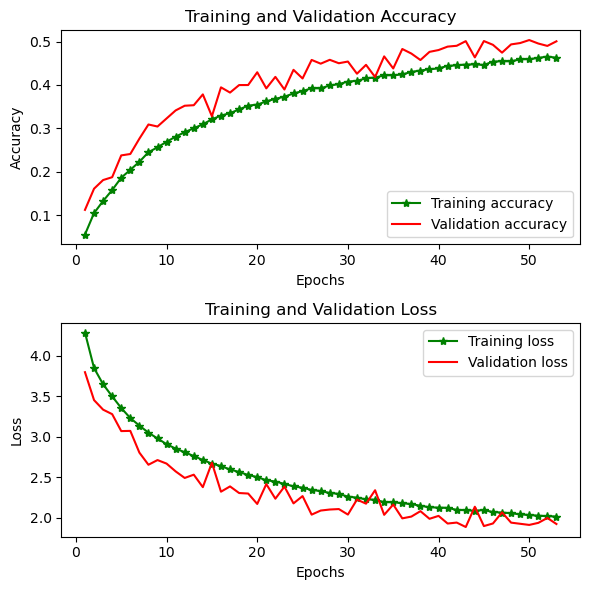

In [25]:
# Visualizing the results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Plot training and validation accuracy
ax1.plot(epochs, acc, 'g*-', label='Training accuracy')
ax1.plot(epochs, val_acc, 'r-', label='Validation accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(epochs, loss, 'g*-', label='Training loss')
ax2.plot(epochs, val_loss, 'r-', label='Validation loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


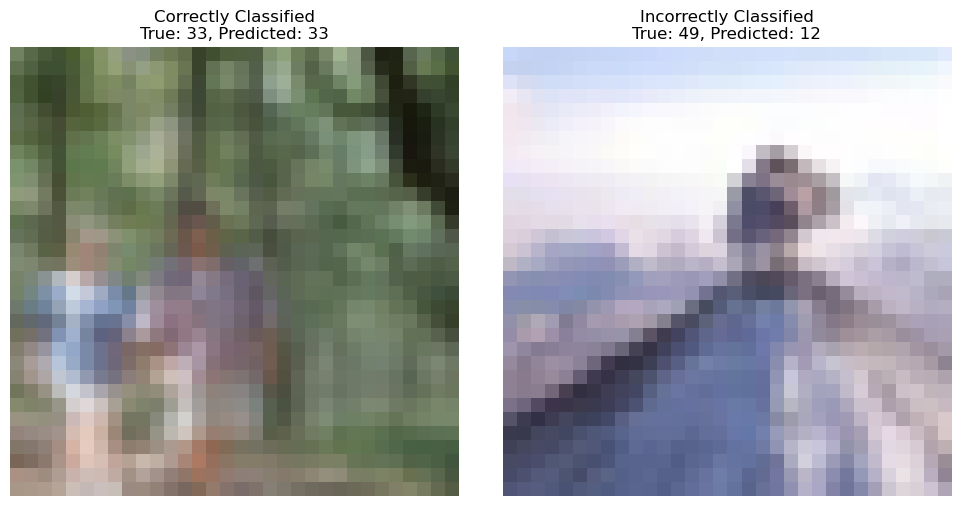

In [34]:
# Correctly classified in the test set, and an image that the model incorrectly classified in the test set
# Make predictions on the test set
predictions2 = model.predict(x_test)

# Convert predictions to class labels (for categorical predictions)
predicted_classes2 = np.argmax(predictions2, axis=1)
true_classes2 = np.argmax(y_test, axis=1)

# Identify indices of correctly classified and incorrectly classified images
correct_indices2 = np.where(predicted_classes2 == true_classes)[0]
incorrect_indices2 = np.where(predicted_classes2 != true_classes)[0]

# Select one correctly classified image
correct_index2 = correct_indices2[0]  # Get the first correctly classified image
correct_image2 = x_test[correct_index2]
correct_prediction2 = predicted_classes2[correct_index2]
true_label_correct2 = true_classes2[correct_index2]


# Select one incorrectly classified image
incorrect_index2 = incorrect_indices2[0]  # Get the first incorrectly classified image
incorrect_image2 = x_test[incorrect_index2]
incorrect_prediction2 = predicted_classes2[incorrect_index2]
true_label_incorrect2 = true_classes2[incorrect_index2]

# Plotting the images
plt.figure(figsize=(10, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(correct_image2)
plt.title(f"Correctly Classified\nTrue: {true_label_correct2}, Predicted: {correct_prediction2}")
plt.axis('off')

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image2)
plt.title(f"Incorrectly Classified\nTrue: {true_label_incorrect2}, Predicted: {incorrect_prediction2}")
plt.axis('off')

plt.tight_layout()
plt.show()

In [35]:
# Reporting the model's classification probabilities
correct_probabilities2 = predictions2[correct_index2]
incorrect_probabilities2 = predictions2[incorrect_index2]

print("Classification Probabilities for Correctly Classified Image:")
for i, prob in enumerate(correct_probabilities2):
    print(f"Class {i}: {prob:.4f}")

print("\nClassification Probabilities for Incorrectly Classified Image:")
for i, prob in enumerate(incorrect_probabilities2):
    print(f"Class {i}: {prob:.4f}")

Classification Probabilities for Correctly Classified Image:
Class 0: 0.0000
Class 1: 0.0008
Class 2: 0.0010
Class 3: 0.0099
Class 4: 0.0082
Class 5: 0.0011
Class 6: 0.0022
Class 7: 0.0002
Class 8: 0.0072
Class 9: 0.0022
Class 10: 0.0002
Class 11: 0.0011
Class 12: 0.0320
Class 13: 0.0007
Class 14: 0.0036
Class 15: 0.0028
Class 16: 0.0010
Class 17: 0.0049
Class 18: 0.0175
Class 19: 0.0095
Class 20: 0.0000
Class 21: 0.0023
Class 22: 0.0001
Class 23: 0.0002
Class 24: 0.0000
Class 25: 0.0010
Class 26: 0.0003
Class 27: 0.0071
Class 28: 0.0003
Class 29: 0.0149
Class 30: 0.0004
Class 31: 0.0377
Class 32: 0.0020
Class 33: 0.2923
Class 34: 0.0119
Class 35: 0.0030
Class 36: 0.0003
Class 37: 0.0944
Class 38: 0.0160
Class 39: 0.0002
Class 40: 0.0002
Class 41: 0.0008
Class 42: 0.0142
Class 43: 0.0005
Class 44: 0.0034
Class 45: 0.0021
Class 46: 0.0031
Class 47: 0.0004
Class 48: 0.0000
Class 49: 0.0002
Class 50: 0.0061
Class 51: 0.0157
Class 52: 0.0002
Class 53: 0.0000
Class 54: 0.0018
Class 55: 0.00

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

**Results from baseline model**
training AUC: 0.9971 - accuracy: 0.9534 - loss: 0.1580 
Validation AUC: 0.8254 - accuracy: 0.4221 - loss: 4.3580

**Results new model**
Training: AUC: 0.9515 - accuracy: 0.4673 - loss: 1.9898
Validation: AUC: 0.9498 - accuracy: 0.5005 - loss: 1.9240

The new model shows a notable improvement in test performance compared to the baseline. The test loss decreased from 4.2958 to 1.8999, and the test accuracy increased from 0.8240 to 0.9524. Although the AUC for the new model (0.5000) suggests reduced class discrimination, the improved training and validation metrics from the new model suggest better generalization.

The performance improvement likely results from the addition of early stopping and data augmentation, which help prevent overfitting and enhance the model's ability to generalize by introducing variability in training data.

However, there is stil room for improvement, specialy in the AUC, indicating the model may not fully capture complex patterns. May experimenting with more complex models (e.g., ResNet), a learning rate schedulers can be use too, or using transfer learning with pre-trained models can help to get better results. Additionally, tuning hyperparameters can help improving the model performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.